In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [11]:
data = pd.read_csv("housing2.csv" , sep = "," , encoding = 'utf-8')

In [12]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,330,1.5603,78100,INLAND,female
20636,-121.21,39.49,18.0,697,150.0,356.0,114,2.5568,77100,INLAND,male
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433,1.7000,92300,INLAND,female
20638,-121.32,39.43,18.0,1860,409.0,741.0,349,1.8672,84700,INLAND,male


# Explore data

In [13]:
data.head

<bound method NDFrame.head of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0          880           129.0   
1        -122.22     37.86                21.0         7099          1106.0   
2        -122.24     37.85                52.0         1467           190.0   
3        -122.25     37.85                52.0         1274           235.0   
4        -122.25     37.85                 NaN         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0         1665           374.0   
20636    -121.21     39.49                18.0          697           150.0   
20637    -121.22     39.43                17.0         2254           485.0   
20638    -121.32     39.43                18.0         1860           409.0   
20639    -121.24     39.37                16.0         2785           616.0   

       population hou

In [14]:
data.shape

(20640, 11)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


In [16]:
data.isnull().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

In [17]:
data.duplicated().sum()

0

<AxesSubplot:>

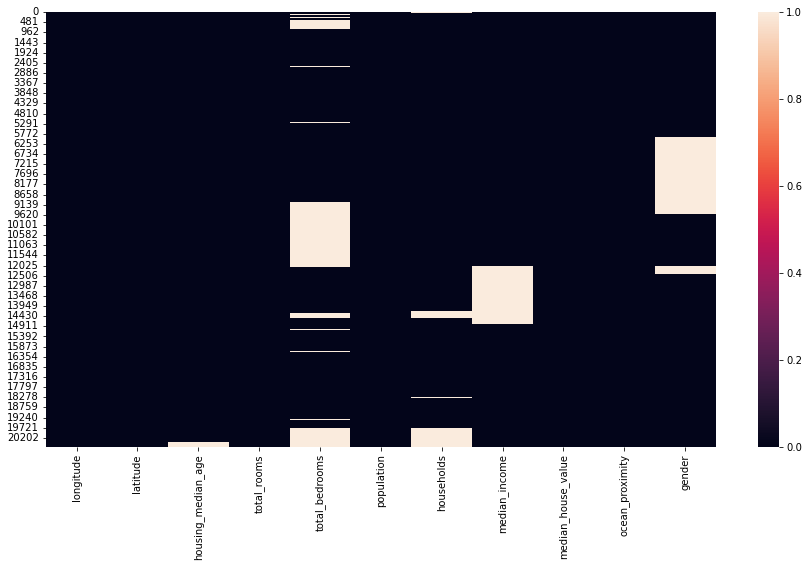

In [20]:
plt.figure(figsize =(15,8))
sns.heatmap(data.isnull())

In [21]:
df = data.dropna(thresh =9 )
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,gender
0,-122.23,37.88,41.0,880,129.0,322.0,126,8.3252,452600,NEAR BAY,male
1,-122.22,37.86,21.0,7099,1106.0,2401.0,1138,8.3014,358500,NEAR BAY,female
2,-122.24,37.85,52.0,1467,190.0,496.0,177,7.2574,352100,NEAR BAY,male
3,-122.25,37.85,52.0,1274,235.0,558.0,219,5.6431,341300,NEAR BAY,female
4,-122.25,37.85,NaN,1627,280.0,NaN,259,3.8462,342200,NEAR BAY,male
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665,374.0,845.0,330,1.5603,78100,INLAND,female
20636,-121.21,39.49,18.0,697,150.0,356.0,114,2.5568,77100,INLAND,male
20637,-121.22,39.43,17.0,2254,485.0,1007.0,433,1.7000,92300,INLAND,female
20638,-121.32,39.43,18.0,1860,409.0,741.0,349,1.8672,84700,INLAND,male


In [22]:
df.isnull().sum()

longitude                0
latitude                 0
housing_median_age      38
total_rooms              0
total_bedrooms        4404
population              37
households             887
median_income         2498
median_house_value       0
ocean_proximity          0
gender                3953
dtype: int64

<AxesSubplot:>

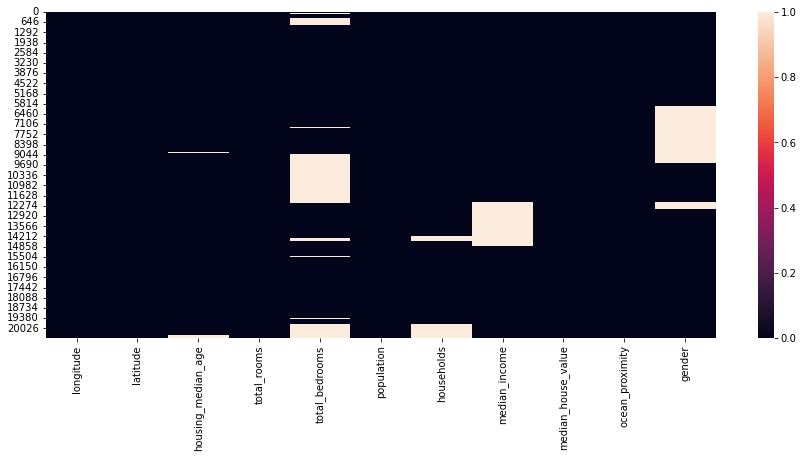

In [23]:
plt.figure(figsize=(15,6))
sns.heatmap(data.isnull())

# Distribution of each column before and after filling its missing values


In [24]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'gender'],
      dtype='object')

In [25]:
df["housing_median_age"].describe()

count    20116.000000
mean        28.661265
std         12.585627
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

In [26]:
df["housing_median_age"].isnull().sum()

38

<AxesSubplot:xlabel='housing_median_age', ylabel='Density'>

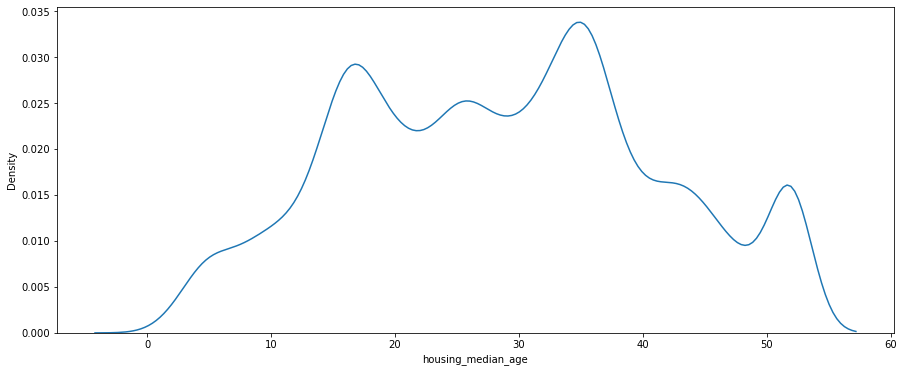

In [27]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=df   , x="housing_median_age" ,palette='cubehelix')

In [28]:
df["housing_median_age"] = df["housing_median_age"].fillna(df["housing_median_age"].mean())

C:\Users\abdow\AppData\Local\Temp\ipykernel_16244\534017099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["housing_median_age"] = df["housing_median_age"].fillna(df["housing_median_age"].mean())


In [29]:
df["housing_median_age"].isnull().sum()

0

<AxesSubplot:xlabel='housing_median_age', ylabel='Density'>

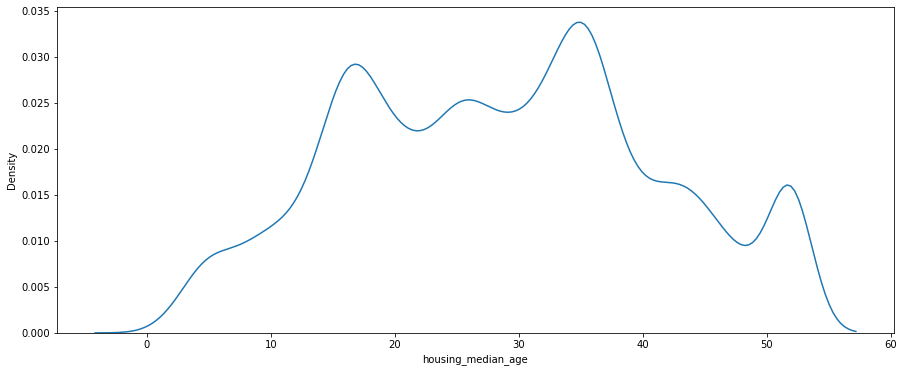

In [30]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=df   , x="housing_median_age" ,palette='cubehelix')

In [31]:
df["total_bedrooms"].describe()


count    15750.000000
mean       539.970857
std        419.873565
min          1.000000
25%        296.000000
50%        435.000000
75%        652.000000
max       6210.000000
Name: total_bedrooms, dtype: float64

In [32]:
df["total_bedrooms"].isnull().sum()


4404

<AxesSubplot:xlabel='total_bedrooms', ylabel='Density'>

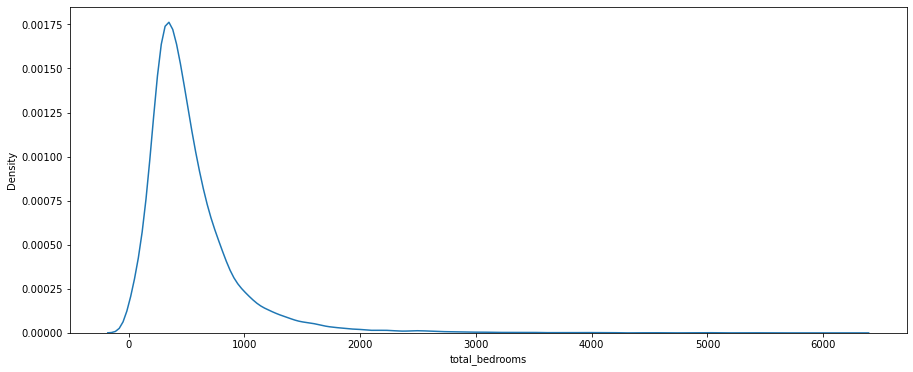

In [33]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=df   , x="total_bedrooms" ,palette='cubehelix')

In [34]:
y = df["total_bedrooms"].mode()[0]
y

280.0

In [38]:
df["total_bedrooms"].fillna(df["total_bedrooms"].mode() [0] , inplace = True)

C:\Users\abdow\AppData\Local\Temp\ipykernel_16244\2545790448.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_bedrooms"].fillna(df["total_bedrooms"].mode() [0] , inplace = True)


In [39]:
df["total_bedrooms"].isnull().sum()

0

<AxesSubplot:xlabel='total_bedrooms', ylabel='Density'>

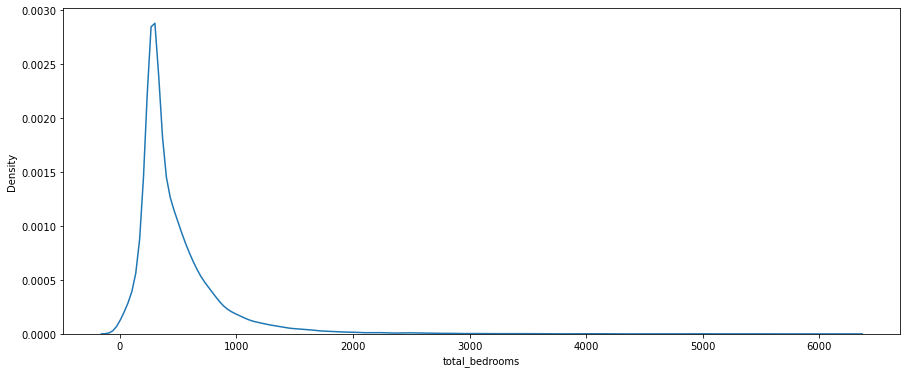

In [40]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=df   , x="total_bedrooms" ,palette='cubehelix')

In [41]:
df["population"].describe()

count    20117.000000
mean      1425.034299
std       1127.149549
min          3.000000
25%        790.000000
50%       1168.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

In [42]:
df["population"].isnull().sum()


37

<AxesSubplot:xlabel='population', ylabel='Density'>

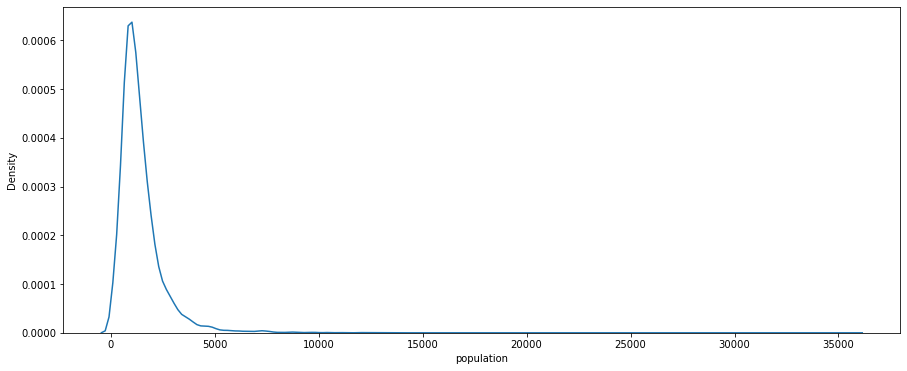

In [43]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=df   , x="population" ,palette='cubehelix')

In [44]:
df["population"] = df["population"].fillna(df["population"].mean())

C:\Users\abdow\AppData\Local\Temp\ipykernel_16244\362556559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["population"] = df["population"].fillna(df["population"].mean())


In [46]:
df["population"].isnull().sum()

0

<AxesSubplot:xlabel='population', ylabel='Density'>

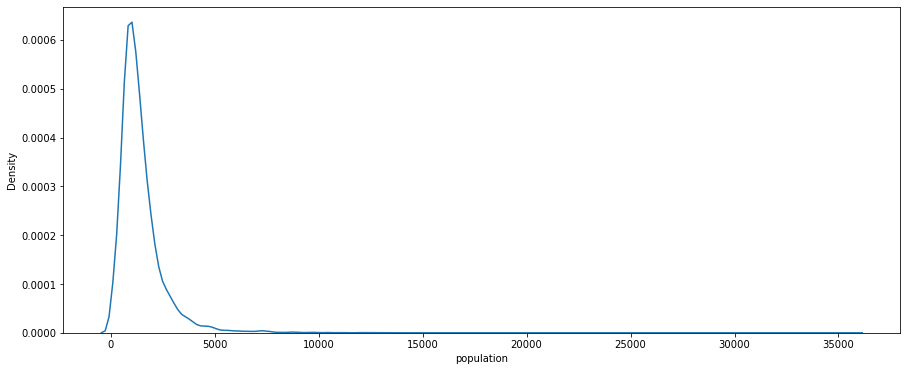

In [47]:
plt.figure(figsize=(15,6))
sns.kdeplot(data=df   , x="population" ,palette='cubehelix')

In [48]:
df["households"].describe()

count     19267
unique     1696
top          no
freq       3069
Name: households, dtype: object

In [49]:
df["households"].isnull().sum()

887

In [51]:
df["households"].replace("no",0,inplace = True)


C:\Users\abdow\AppData\Local\Temp\ipykernel_16244\1532326578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["households"].replace("no",0,inplace = True)


In [53]:
df["households"].describe()

count     19267
unique     1696
top           0
freq       3069
Name: households, dtype: int64

C:\Users\abdow\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='households', ylabel='Density'>

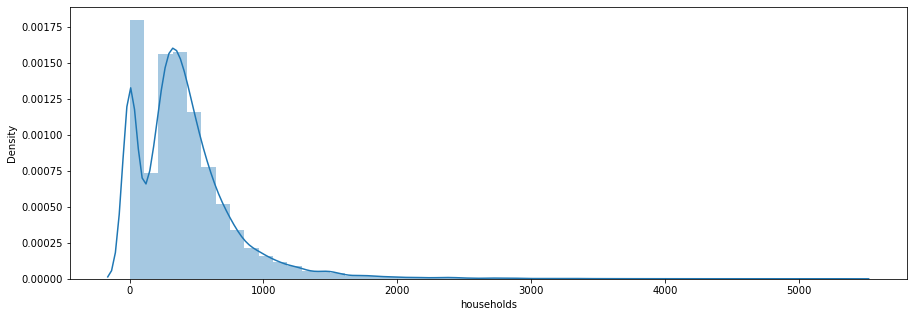

In [54]:
plt.figure(figsize=(15,5))
sns.distplot(df["households"])

In [55]:
df["households"].isnull().sum()

887

In [56]:
df["households"] = df["households"].fillna(df["households"].mode() [0])

C:\Users\abdow\AppData\Local\Temp\ipykernel_16244\1642142439.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["households"] = df["households"].fillna(df["households"].mode() [0])


In [57]:
df["households"].isnull().sum()

0

C:\Users\abdow\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='households', ylabel='Density'>

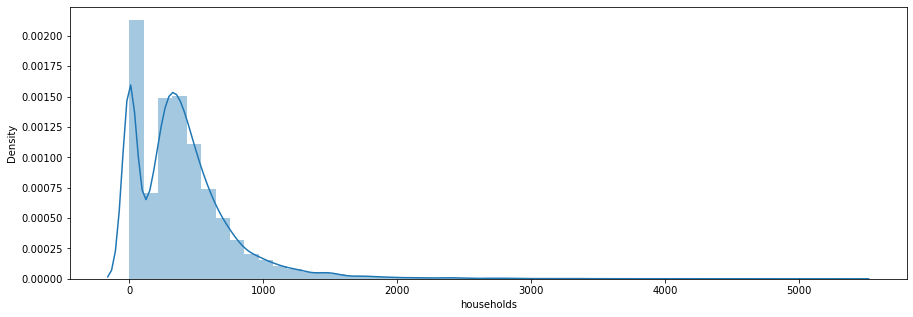

In [60]:
plt.figure(figsize=(15,5))
sns.distplot(df["households"])

In [61]:
df["median_income"].describe()


count    17656.000000
mean         3.939650
std          1.944297
min          0.499900
25%          2.600000
50%          3.587500
75%          4.829500
max         15.000100
Name: median_income, dtype: float64

In [62]:
df["median_income"].isnull().sum()


2498

<Figure size 1080x432 with 0 Axes>

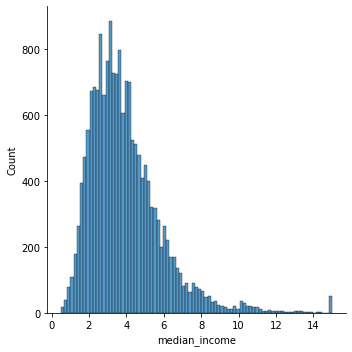

In [65]:
plt.figure(figsize=(15,6))
sns.displot(df["median_income"])           

In [67]:
df["median_income"] = df["median_income"].fillna(df["median_income"].std())

C:\Users\abdow\AppData\Local\Temp\ipykernel_16244\2710416703.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["median_income"] = df["median_income"].fillna(df["median_income"].std())


In [68]:
df["median_income"].isnull().sum()

0

<Figure size 1080x432 with 0 Axes>

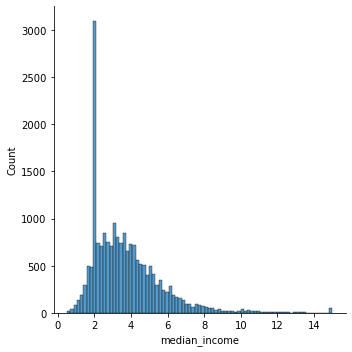

In [69]:
plt.figure(figsize=(15,6))
sns.displot(df["median_income"])     